## Install Packages

In [1]:
# !pip install cloud-tpu-client==0.10 https://storage.googleapis.com/tpu-pytorch/wheels/torch_xla-1.9-cp37-cp37m-linux_x86_64.whl
# !pip install torch==1.9.0+cu111 torchvision==0.10.0+cu111 torchtext==0.10.0 -f https://download.pytorch.org/whl/cu111/torch_stable.html
# !pip install 'u8darts[torch]==0.17.1'
# !pip install pyyaml==5.4.1

In [2]:
!pip install darts
import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 400 kB 8.2 MB/s 
     |████████████████████████████████| 585 kB 5.4 MB/s 
     |████████████████████████████████| 45 kB 4.0 MB/s 
     |████████████████████████████████| 43 kB 2.9 MB/s 
     |████████████████████████████████| 793 kB 55.1 MB/s 
     |████████████████████████████████| 11.2 MB 52.6 MB/s 
     |████████████████████████████████| 179 kB 51.3 MB/s 
     |████████████████████████████████| 9.8 MB 48.7 MB/s 
     |████████████████████████████████| 1.4 MB 60.5 MB/s 
     |████████████████████████████████| 381 kB 68.4 MB/s 
     |████████████████████████████████| 944 kB 66.2 MB/s 
     |████████████████████████████████| 419 kB 69.6 MB/s 
     |████████████████████████████████| 140 kB 67.9 MB/s 
     |████████████████████████████████| 596 kB 50.7 MB/s 
     |████████████████████████████████| 1.1 MB 61.0 MB/s 
     |██████████████████████████████

In [3]:
#Set up proper environment

In [4]:
!pip install pyyaml==5.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 636 kB 6.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


In [5]:
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 7.4 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:
      Successfully uninstalled matplotlib-3.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nfoursid 1.0.1 requires matplotlib>=3.3, but you have matplotlib 3.1.3 which is incompatible.
darts 0.20.0 requires matplotlib>=3.3.0, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [6]:
#Check if GPU is available
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri Jul 22 15:05:26 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Import Packages

In [22]:
from darts import TimeSeries

In [23]:
from darts.utils.statistics import check_seasonality, plot_acf, plot_residuals_analysis
from darts.utils.utils import SeasonalityMode
import datetime

In [24]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.utils.timeseries_generation import (
    gaussian_timeseries,
    linear_timeseries,
    sine_timeseries,
)
from darts.models import (
    RNNModel,
    TCNModel,
    TransformerModel,
    NBEATSModel,
    BlockRNNModel,
    RNNModel,
    AutoARIMA,
    VARIMA,
    ExponentialSmoothing,
    Theta,
    RegressionModel,
    RandomForest,
    TFTModel
)
from darts.metrics import mape, smape, rmse
from darts.dataprocessing.transformers import Scaler
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.datasets import AirPassengersDataset, MonthlyMilkDataset
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.metrics import r2_score

import joblib

In [25]:
pd.set_option('display.max_columns',None)

## Import dataset and preprocessing

### Import and fill NA

In [72]:
df = pd.read_csv('df_exp.csv')

In [73]:
#Set time as the index for time series

In [74]:
df['ts10'] = pd.to_datetime(df['ts10'])
df.set_index('ts10',inplace=True)
df.head()

,Unnamed: 0,pax_B1_dom,pax_B2_dom,pax_B3_dom,pax_B1_intl,pax_B2_intl,pax_B3_intl,total_doses,holiday,seats_tr,seats_lc,tod_Afternoon,tod_Evening,tod_Morning,tod_Overnight,Date,Hour,Minute,pax_C1,pax_C2,pax_C3
ts10,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,0,0.0,0.0,0.0,0.0,0.0,0.0,4438527,1,0.0,0.0,0,0,0,1,2021/1/1,0.0,0.0,0.0,0.0,2.0
2021-01-01 00:10:00,1,0.0,0.0,0.0,0.0,0.0,0.0,4438527,1,0.0,0.0,0,0,0,1,2021/1/1,0.0,10.0,0.0,0.0,4.0
2021-01-01 00:20:00,2,0.0,0.0,0.0,0.0,0.0,0.0,4438527,1,0.0,0.0,0,0,0,1,2021/1/1,0.0,20.0,0.0,0.0,7.0
2021-01-01 00:30:00,3,0.0,0.0,0.0,0.0,0.0,0.0,4438527,1,0.0,0.0,0,0,0,1,2021/1/1,0.0,30.0,0.0,0.0,1.0
2021-01-01 00:40:00,4,0.0,0.0,0.0,0.0,0.0,0.0,4438527,1,0.0,0.0,0,0,0,1,2021/1/1,0.0,40.0,1.0,0.0,2.0


In [75]:
#Fill the empty values with 0 for the modeling

In [76]:
df['pax_C3'] = df['pax_C3'].fillna(0.0)

In [77]:
df['pax_C1'] = df['pax_C1'].fillna(0.0)
df['pax_C2'] = df['pax_C2'].fillna(0.0)

In [78]:
# some of the deep learning models/TPU processing are sensitive about datatypes
# df[df.select_dtypes(np.float64).columns] = df.select_dtypes(np.float64).astype(np.float32)

### Add total arriving passengers as additional covariates

In [79]:
arrpax = pd.read_csv('ArrPaxFinaldf.csv',usecols=['TimeInterval','AT_PAX','FHV#','Parking#'])

In [80]:
arrpax.head()

,TimeInterval,AT_PAX,Parking#,FHV#
0,2021-03-13 00:00:00,3.166667,5.333333,1.333333
1,2021-03-13 00:10:00,3.166667,5.333333,1.333333
2,2021-03-13 00:20:00,3.166667,5.333333,1.333333
3,2021-03-13 00:30:00,3.166667,5.333333,1.333333
4,2021-03-13 00:40:00,3.166667,5.333333,1.333333


In [81]:
arrpax['TimeInterval'] = pd.to_datetime(arrpax['TimeInterval'])
arrpax.set_index('TimeInterval',inplace=True)

In [82]:
arrpax = arrpax.asfreq('10T')
arrpax.index = pd.to_datetime(arrpax.index)
type(arrpax.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [83]:
arrpax['arrpax_total'] = arrpax['AT_PAX'] + arrpax['Parking#'] + arrpax['FHV#']

In [84]:
arrpax.head()

,AT_PAX,Parking#,FHV#,arrpax_total
TimeInterval,,,,
2021-03-13 00:00:00,3.166667,5.333333,1.333333,9.833333
2021-03-13 00:10:00,3.166667,5.333333,1.333333,9.833333
2021-03-13 00:20:00,3.166667,5.333333,1.333333,9.833333
2021-03-13 00:30:00,3.166667,5.333333,1.333333,9.833333
2021-03-13 00:40:00,3.166667,5.333333,1.333333,9.833333


In [85]:
#inner merge because arrpax data only starts in March 2021. Will have to train without Jan-Feb, but I'm hoping the new predictor will make up for fewer months of training data.
df = pd.merge(df, arrpax['arrpax_total'],how='inner',left_index=True, right_index=True)

In [87]:
df.head()

,Unnamed: 0,pax_B1_dom,pax_B2_dom,pax_B3_dom,pax_B1_intl,pax_B2_intl,pax_B3_intl,total_doses,holiday,seats_tr,seats_lc,tod_Afternoon,tod_Evening,tod_Morning,tod_Overnight,Date,Hour,Minute,pax_C1,pax_C2,pax_C3,arrpax_total
2021-03-13 00:00:00,10224,0.0,0.0,0.0,0.0,0.0,0.0,118109283,0,0.0,0.0,0,0,0,1,2021/3/13,0.0,0.0,1.0,0.0,11.0,9.833333
2021-03-13 00:10:00,10225,0.0,0.0,0.0,0.0,0.0,0.0,118109283,0,0.0,0.0,0,0,0,1,2021/3/13,0.0,10.0,0.0,0.0,23.0,9.833333
2021-03-13 00:20:00,10226,0.0,0.0,0.0,0.0,0.0,0.0,118109283,0,0.0,0.0,0,0,0,1,2021/3/13,0.0,20.0,0.0,0.0,19.0,9.833333
2021-03-13 00:30:00,10227,0.0,0.0,0.0,0.0,0.0,0.0,118109283,0,0.0,0.0,0,0,0,1,2021/3/13,0.0,30.0,0.0,0.0,27.0,9.833333
2021-03-13 00:40:00,10228,0.0,0.0,0.0,0.0,0.0,0.0,118109283,0,0.0,0.0,0,0,0,1,2021/3/13,0.0,40.0,0.0,0.0,20.0,9.833333


### Choose Targets and Predictors(covariates)

In [88]:
targets = df[['pax_C1','pax_C2','pax_C3']]
covariates = df[['pax_B1_dom', 'pax_B2_dom', 'pax_B3_dom', 'pax_B1_intl', 'pax_B2_intl',
       'pax_B3_intl','holiday','seats_tr','seats_lc','arrpax_total']]

# seats_tr and seats_lc might be redundant because it is included in the departing pax model that predicts the pax_B1_dom, etc. features, but probably doesn't hurt to include
# same for holiday

In [89]:
targets.columns

Index(['pax_C1', 'pax_C2', 'pax_C3'], dtype='object')

In [90]:
covariates.columns

Index(['pax_B1_dom', 'pax_B2_dom', 'pax_B3_dom', 'pax_B1_intl', 'pax_B2_intl',
       'pax_B3_intl', 'holiday', 'seats_tr', 'seats_lc', 'arrpax_total'],
      dtype='object')

In [91]:
cov = TimeSeries.from_dataframe(covariates)
tar = TimeSeries.from_dataframe(targets)

### Standard scaler and train-test split

In [29]:
#Data transformation

In [92]:
sc_cov = Scaler()
cov_sc = sc_cov.fit_transform(cov)

# shouldn't need to scale the target variable
# sc_tar = Scaler()
# tar_sc = sc_tar.fit_transform(tar)

In [31]:
#Train Test Split

In [93]:
cov_train, cov_test = cov_sc.split_before(pd.Timestamp(2021,12,1))
tar_train, tar_test = tar.split_before(pd.Timestamp(2021,12,1))

In [33]:
#Plot the test dataset for passengers for concourse A as an example

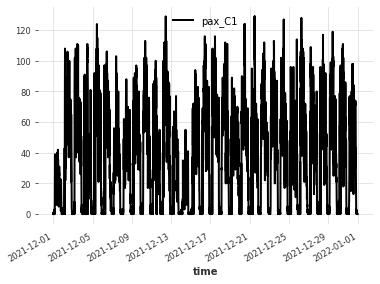

In [94]:
tar_test['pax_C1'].plot()

## Model evaluation/plotting functions

In [95]:
def eval_model(model, tar_vars, start_date, end_date, past_covariates=None, future_covariates=None):
    # Past and future covariates are optional because they won't always be used in our tests
    
    # We backtest the model on the last 20% of the flow series, with a horizon of 10 steps:
    backtest = model.historical_forecasts(series=tar, 
                                          past_covariates=past_covariates,
                                          future_covariates=future_covariates,
                                          start=0.8, 
                                          retrain=False,
                                          verbose=True, 
                                          forecast_horizon=10)
    
    s_date = pd.to_datetime(start_date)
    e_date = pd.to_datetime(end_date)

    tar[s_date:e_date][tar_vars].plot()
    backtest[s_date:e_date][tar_vars].plot(label='backtest (n=10)')
    print('Backtest RMSE = {}'.format(rmse(tar, backtest)))


In [106]:
def plot_agg_result(actual, pred,frequency,start_date,end_date):

    test_df = actual.pd_dataframe()
    test_df = pd.merge(test_df, pred.pd_dataframe(), how='right',left_index=True, right_index=True)

    
    test_df = test_df.reset_index()
    test_df = test_df.groupby(pd.Grouper(key="time", freq=frequency)).sum()

    s_date = pd.to_datetime(start_date)
    e_date = pd.to_datetime(end_date)

    print(r2_score(test_df.iloc[:,0],test_df.iloc[:,1]))
    test_df.loc[(test_df.index >= s_date) & (test_df.index <= e_date),:].plot()

## Darts Regression Model

In [99]:
# without arrpax_total as a covariate, lag range of 2-18 (20 minutes to 3 hours) is good relative to scheduled departure time
# including arrpax_total, we should expand the lag range to -9 (1.5 hour), i.e. passengers arriving at the airport up to 1 hour before passing security
regr_model = RegressionModel(lags=None, lags_future_covariates=[i for i in range(-9,19)])

regr_model.fit(tar_train, future_covariates=cov_sc)

In [101]:
pred = regr_model.predict(n=4445,future_covariates=cov_sc)

In [102]:
r2_score(tar_test[:4445].pd_dataframe(),pred.pd_dataframe())

0.5531965518371392

0.7682277949267158


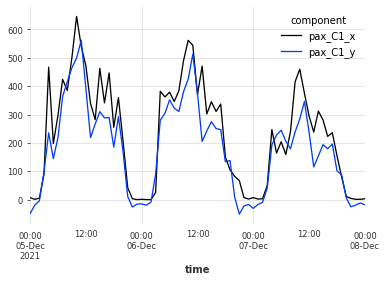

In [108]:
plot_agg_result(tar_test[:4445]['pax_C1'], pred['pax_C1'],'1H','2021-12-05','2021-12-08')

0.626913086066515


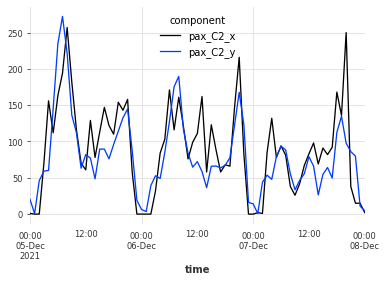

In [111]:
plot_agg_result(tar_test[:4445]['pax_C2'], pred['pax_C2'],'1H','2021-12-05','2021-12-08')

0.6194919717224898


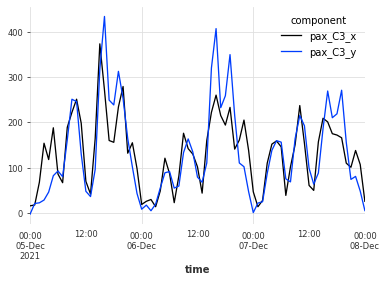

In [110]:
plot_agg_result(tar_test[:4450]['pax_C3'], pred['pax_C3'],'1H','2021-12-05','2021-12-08')

In [114]:
joblib.dump(regr_model, 'concourse_lr.pkl')

['concourse_lr.pkl']

## VARIMA

In [ ]:
varima = VARIMA()
varima.fit(tar_train, future_covariates=cov_sc)

In [ ]:
from statsmodels.tsa.api import VARMAX

In [ ]:
va = VARMAX(endog=tar_train.pd_dataframe(),exog=cov_sc.pd_dataframe()[:48096],order = (1,0))

In [ ]:
res = va.fit(maxiter=2,disp=False)

In [ ]:
print(res.summary())

In [ ]:
va.predict(exog=cov_sc.pd_dataframe())

## Random Forest

In [ ]:
rf_model = RandomForest(lags=None,lags_future_covariates=(2,15),n_estimators=20, max_depth = 15)

rf_model.fit(tar_train, future_covariates=cov_sc)

In [ ]:
pred = rf_model.predict(n=4450,future_covariates=cov_sc)
r2_score(tar_test[:4450].pd_dataframe(),pred.pd_dataframe())

## Temporal Fusion Transformer

In [ ]:
tft_model = TFTModel(
    input_chunk_length=144,
    output_chunk_length=6,
    n_epochs = 5,optimizer_kwargs={'lr': .001},
    pl_trainer_kwargs={
      "accelerator": "gpu",
      "auto_select_gpus":True
    }
    )

In [ ]:
tft_model.fit(tar_train, future_covariates=cov_sc)

In [ ]:
sc_tar.inverse_transform(tft_model.predict(n=4000,future_covariates=cov_sc))[2500:2800]['pax_C1'].plot(label='predicted')
sc_tar.inverse_transform(tar_test)[2500:2800]['pax_C1'].plot(label='actual')

In [ ]:
pred = tft_model.predict(n=4450,future_covariates=cov_sc)
print(r2_score(tar_test[:4450].pd_dataframe(),pred.pd_dataframe()))

## RNN-LSTM

In [ ]:
model_rnn = RNNModel(
    model="LSTM",
    input_chunk_length=1008,
    output_chunk_length=1008,
    n_rnn_layers = 4,
    hidden_dim=25,
    n_epochs=75,
    optimizer_kwargs={'lr': .01},
    torch_device_str = 'cuda'
)

In [ ]:
model_rnn.fit(tar_train, future_covariates=cov_sc)

In [ ]:
model_rnn.model_params

In [ ]:
pred = model_rnn.predict(n=4450,future_covariates=cov_sc)
print(r2_score(tar_test[:4450].pd_dataframe(),pred.pd_dataframe()))

In [ ]:
pred = model_rnn.predict(n=4450,future_covariates=cov_sc)
r2_score(tar_test[:4450].pd_dataframe()['pax_C1'],pred.pd_dataframe()['pax_C1'])

In [ ]:
plt.rcParams["figure.figsize"] = (20, 8)

In [ ]:
sc_tar.inverse_transform(model_rnn.predict(n=4000,future_covariates=cov_sc))[3000:3750]['pax_C1'].plot(label='LSTMpredicted')
sc_tar.inverse_transform(regr_model.predict(n=4000,future_covariates=cov_sc))[3000:3750]['pax_C1'].plot(label='regpredicted')
sc_tar.inverse_transform(tar_test)[3000:3750]['pax_C1'].plot(label='actual')

In [ ]:

r2_score(sc_tar.inverse_transform(tar_test)[:3750]['pax_C1'].pd_dataframe(),sc_tar.inverse_transform(model_rnn.predict(n=4000,future_covariates=cov_sc))[:3750]['pax_C1'].pd_dataframe())

In [ ]:
sc_tar.inverse_transform(model_rnn.predict(n=4000,future_covariates=cov_sc))[2000:2300]['pax_C1'].plot()
sc_tar.inverse_transform(tar_test)[2000:2300]['pax_C1'].plot()

In [ ]:
sc_tar.inverse_transform(model_rnn.predict(n=4000,future_covariates=cov_sc))[2000:2300]['pax_C1'].plot()
sc_tar.inverse_transform(tar_test)[2000:2300]['pax_C1'].plot()

In [ ]:
sc_tar.inverse_transform(model_rnn.predict(n=4000,future_covariates=cov_sc))[2000:2300]['pax_C1'].plot()
sc_tar.inverse_transform(tar_test)[2000:2300]['pax_C1'].plot()

In [ ]:
sc_tar.inverse_transform(model_rnn.predict(n=4000,future_covariates=cov_sc))[2000:2300]['pax_C1'].plot()
sc_tar.inverse_transform(tar_test)[2000:2300]['pax_C1'].plot()

In [ ]:
sc_tar.inverse_transform(model_rnn.predict(n=4000,future_covariates=cov_sc))[2000:2300]['pax_C1'].plot()
sc_tar.inverse_transform(tar_test)[2000:2300]['pax_C1'].plot()

In [ ]:
model_rnn_1 = RNNModel(
    model="LSTM",
    input_chunk_length=144,
    output_chunk_length=6,
    n_rnn_layers = 4,
    hidden_dim=25,
    n_epochs=500,
    optimizer_kwargs={'lr': .001},
    pl_trainer_kwargs={
      "accelerator": "gpu",
      "auto_select_gpus":True
      # "tpu_cores": [4],
      # "precision":32
    }
    # torch_device_str = 'cuda'
)

In [ ]:
model_rnn_1.fit(tar_train, future_covariates=cov_sc)

In [ ]:
import joblib
joblib.dump(model_rnn_1,'rnn_bad.pkl')

In [ ]:
sc_tar.inverse_transform(model_rnn_1.predict(n=4000,future_covariates=cov_sc))[2500:2800]['pax_C1'].plot(label='predicted')
sc_tar.inverse_transform(tar_test)[2500:2800]['pax_C1'].plot(label='actual')

In [ ]:
pred = model_rnn_1.predict(n=4450,future_covariates=cov_sc)
print(r2_score(tar_test[:4450].pd_dataframe(),pred.pd_dataframe()))

In [ ]:
#Initialize the LSTM model

In [ ]:
model_cov = BlockRNNModel(
    model="LSTM",
    input_chunk_length=2016,
    output_chunk_length=1008,
    n_epochs=2
)

In [ ]:
model_cov.fit(
    series=tar_train,
    past_covariates= cov_train,
    verbose=True,
)

In [ ]:
#Use model to predict 

In [ ]:
pred = model_cov.predict(len(tar_test), series=tar_train, past_covariates=cov_sc)

In [ ]:
#Plot passenger passing concourse  A/B/C actual vs predicted for reference
pred['pax_C1'][:500].plot()
tar_test['pax_C1'][:500].plot()

In [ ]:
pred['pax_C2'][:500].plot()
tar_test['pax_C2'][:500].plot()

In [ ]:
pred['pax_C3'][:500].plot()
tar_test['pax_C3'][:500].plot()